In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Augmented_Chiller_Data.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Imbalanced_Augmented_Chiller_Data_VAE.csv', encoding='unicode_escape')
data

C:\Users\Hsiao-ping.ni\Anaconda3\envs\my_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ï»¿Discharge Temp (F),Input % full load amps (Motor) (%),Condenser liq temp IN (F),Condenser liq temp OUT (F),Chilled liq temp IN (F),Chilled liq temp OUT (F),Condenser saturation (F),Evaporator saturation (F),Evaporator pressure (PSIG),Condenser pressure (PSIG),Oil sump temp (F),Oil pressure (PSIG)
0,103.086761,53.311462,78.745308,84.077736,48.115696,41.066639,83.926613,40.355923,36.075794,94.755562,131.770355,35.583218
1,101.390236,50.855354,77.039841,82.832085,45.980221,39.503784,83.222313,38.498833,33.940025,93.077370,131.303909,33.801552
2,103.762649,53.719456,80.088417,85.289040,50.272709,43.509457,86.213768,42.914425,38.391171,97.180389,130.579712,38.248146
3,101.848854,51.188293,77.623917,83.279732,46.636112,40.014042,83.428551,39.130108,34.759552,93.847900,131.044052,34.871735
4,102.148704,51.810246,78.214180,83.615448,46.999065,40.373535,83.460411,39.632801,35.101955,94.235580,131.676148,35.285069
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,100.962738,50.693485,76.377106,81.896050,45.030388,38.641102,82.645638,37.702213,33.086735,92.351524,131.382492,32.664757
2496,97.170815,45.356049,72.464241,77.497398,40.953827,33.468998,81.153587,33.140079,28.122267,87.618484,130.806473,27.966702
2497,101.509109,50.871300,77.227501,83.009628,46.162296,39.649761,83.336899,38.636024,34.109447,93.238892,131.232941,34.090763
2498,101.939301,51.596542,78.051865,83.374733,46.800034,40.218304,83.351372,39.378544,34.979256,94.167305,131.335938,35.137707


[I 2024-12-19 16:58:22,020] A new study created in memory with name: no-name-79e3cea1-33e9-42d3-bf0e-146045be8a0c
C:\Users\Hsiao-ping.ni\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-19 17:00:54,437] Trial 0 finished with value: 0.26213686019182203 and parameters: {'hidden_dim1': 64, 'hidden_dim2': 32, 'latent_dim': 8, 'learning_rate': 0.00045313432170998683, 'batch_size': 32}. Best is trial 0 with value: 0.26213686019182203.
[I 2024-12-19 17:03:23,134] Trial 1 finished with value: 0.2625213786959648 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 16, 'latent_dim': 6, 'learning_rate': 0.0002911216833216946, 'batch_size': 32}. Best is trial 0 with value: 0.26213686019182203.
[I 2024-12-19 17:06:12,392] Trial 2 finished with value: 0.26352264136075976 a

[I 2024-12-19 18:23:21,632] Trial 31 finished with value: 0.25560347735881805 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.00010883587757065636, 'batch_size': 64}. Best is trial 26 with value: 0.2553374066948891.
[I 2024-12-19 18:25:54,936] Trial 32 finished with value: 0.2562061846256256 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.00010345729560124554, 'batch_size': 64}. Best is trial 26 with value: 0.2553374066948891.
[I 2024-12-19 18:28:27,889] Trial 33 finished with value: 0.2571671217679977 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.0001164781257346361, 'batch_size': 64}. Best is trial 26 with value: 0.2553374066948891.
[I 2024-12-19 18:31:04,171] Trial 34 finished with value: 0.25626731365919114 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.00012524200768477178, 'batch_size': 64}. Best is tria

[I 2024-12-19 19:51:19,495] Trial 63 finished with value: 0.2567045256495476 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.00018378982026705384, 'batch_size': 64}. Best is trial 26 with value: 0.2553374066948891.
[I 2024-12-19 19:53:35,852] Trial 64 finished with value: 0.25632916688919066 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.00013640347542940494, 'batch_size': 64}. Best is trial 26 with value: 0.2553374066948891.
[I 2024-12-19 19:55:48,453] Trial 65 finished with value: 0.2562136843800545 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 48, 'latent_dim': 14, 'learning_rate': 0.00032366758640597627, 'batch_size': 64}. Best is trial 26 with value: 0.2553374066948891.
[I 2024-12-19 19:58:26,569] Trial 66 finished with value: 0.2563925623893738 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.0001159406363914322, 'batch_size': 64}. Best is tria

[I 2024-12-19 21:16:56,340] Trial 95 finished with value: 0.2553478226065636 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00011008990565952728, 'batch_size': 64}. Best is trial 75 with value: 0.2551396548748016.
[I 2024-12-19 21:19:30,041] Trial 96 finished with value: 0.255827485024929 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00010142757178757931, 'batch_size': 64}. Best is trial 75 with value: 0.2551396548748016.
[I 2024-12-19 21:22:06,352] Trial 97 finished with value: 0.2550571635365486 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00011539092478368463, 'batch_size': 64}. Best is trial 97 with value: 0.2550571635365486.
[I 2024-12-19 21:24:39,519] Trial 98 finished with value: 0.2563917189836502 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00011957875954750394, 'batch_size': 64}. Best is trial 

Best hyperparameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00011539092478368463, 'batch_size': 64}
Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.9990
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7047
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5361
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4527
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3875
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3608
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3375
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3265
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3135
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3119
Epoch 11/100
32/32 [==============================] - 0s 5ms/

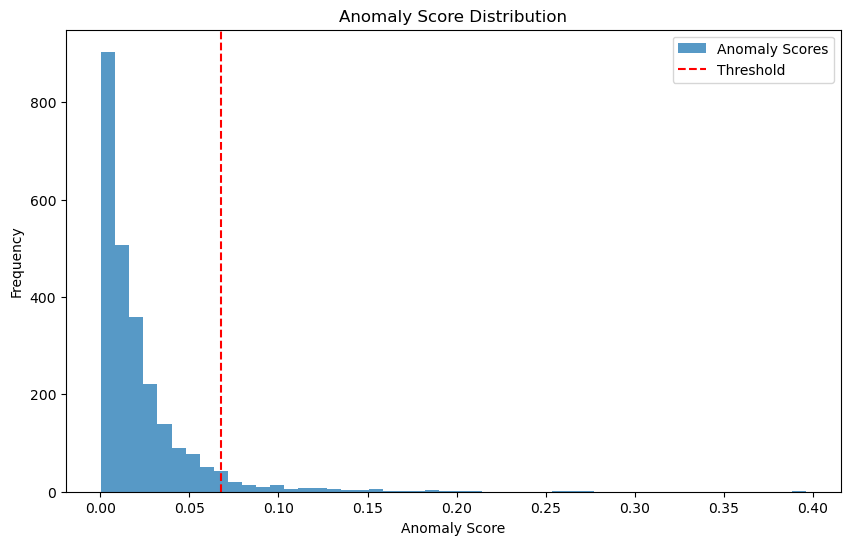

Anomaly-labeled data saved to /Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Anomaly_Detection_Results.xlsx.


In [3]:
# Load and preprocess the data
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Augmented_Chiller_Data.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Imbalanced_Augmented_Chiller_Data_VAE.csv', encoding='unicode_escape')
data = data[['ï»¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Define the Sampling layer for VAE
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# Define VAE architecture
def build_vae(input_dim, hidden_dims, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    x = inputs
    for dim in hidden_dims:
        x = Dense(dim, activation='relu')(x)
    mean = Dense(latent_dim)(x)
    log_var = Dense(latent_dim)(x)
    z = Sampling()([mean, log_var])
    encoder = Model(inputs, [mean, log_var, z], name="encoder")
    
    # Decoder
    latent_inputs = Input(shape=(latent_dim,))
    x = latent_inputs
    for dim in reversed(hidden_dims):
        x = Dense(dim, activation='relu')(x)
    outputs = Dense(input_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name="decoder")
    
    # VAE Model
    reconstructed = decoder(encoder(inputs)[2])
    vae = Model(inputs, reconstructed, name="vae")
    
    # VAE Loss
    reconstruction_loss = mse(inputs, reconstructed) * input_dim
    kl_loss = 1 + log_var - tf.square(mean) - tf.exp(log_var)
    kl_loss = tf.reduce_sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    
    return vae, encoder, decoder

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden_dim1 = trial.suggest_int('hidden_dim1', 32, 128, step=16)
    hidden_dim2 = trial.suggest_int('hidden_dim2', 16, 64, step=16)
    latent_dim = trial.suggest_int('latent_dim', 2, 16, step=2)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_int('batch_size', 16, 64, step=16)
    
    hidden_dims = [hidden_dim1, hidden_dim2]
    vae, _, _ = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    val_losses = []
    
    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        history = vae.fit(x_train_fold, x_train_fold, validation_data=(x_val_fold, x_val_fold), 
                          epochs=100, batch_size=batch_size, verbose=0)
        val_loss = min(history.history['val_loss'])
        val_losses.append(val_loss)
    
    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final VAE using the best hyperparameters
hidden_dims = [best_params['hidden_dim1'], best_params['hidden_dim2']]
latent_dim = best_params['latent_dim']
learning_rate = best_params['learning_rate']
batch_size = best_params['batch_size']

vae, encoder, decoder = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history = vae.fit(X_train, X_train, epochs=100, batch_size=batch_size, verbose=1)

# Anomaly detection on the full dataset (including test set)
reconstructions = vae.predict(data_scaled)
anomaly_scores = np.mean(np.square(data_scaled - reconstructions), axis=1)

# Set an anomaly threshold
threshold = np.percentile(anomaly_scores, 95)  # Top 5% as anomalies
anomalies = anomaly_scores > threshold

# Print anomaly results
print(f"Anomaly threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# Visualize anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.75, label='Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Add anomaly labels to the original dataset
data['Anomaly'] = anomalies.astype(int)

# Save the anomaly-labeled data to an Excel file

output_path = '/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Anomaly_Detection_Results.xlsx'
data.to_excel(output_path, index=False)
print(f"Anomaly-labeled data saved to {output_path}.")



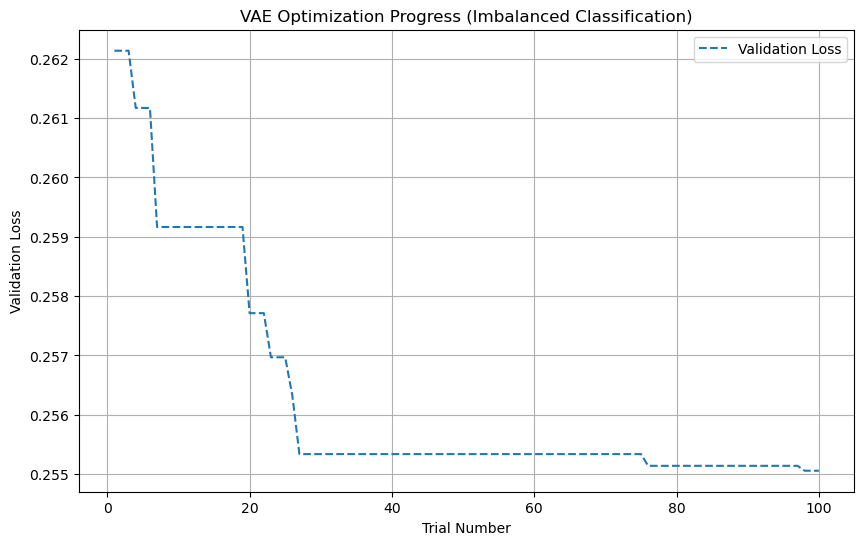

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

# Plot the optimization progress with adjusted validation loss
validation_losses = study.trials_dataframe()['value'].values  # Validation losses from all trials
best_val_loss = np.min(validation_losses)  # Best validation loss found
adjusted_validation_losses = []

# Loop through trials and update adjusted_validation_losses
current_best_loss = float('inf')
for val_loss in validation_losses:
    # Update the best validation loss found so far
    current_best_loss = min(current_best_loss, val_loss)
    adjusted_validation_losses.append(current_best_loss)

# Plot optimization progress
plt.figure(figsize=(10, 6))
#plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Original Validation Loss')
plt.plot(range(1, len(adjusted_validation_losses) + 1), adjusted_validation_losses, 
         label='Validation Loss', linestyle='--')
plt.xlabel('Trial Number')
plt.ylabel('Validation Loss')
plt.title('VAE Optimization Progress (Imbalanced Classification)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Print the best trial and validation loss
best_trial_index = np.argmin(validation_losses)
print(f"Best validation loss: {best_val_loss} at trial {best_trial_index + 1}")

Best validation loss: 0.2550571635365486 at trial 98


16/16 [==============================] - 0s 3ms/step
Anomaly threshold (based on training data): 0.06788480034617121
Number of anomalies detected in the test set: 22


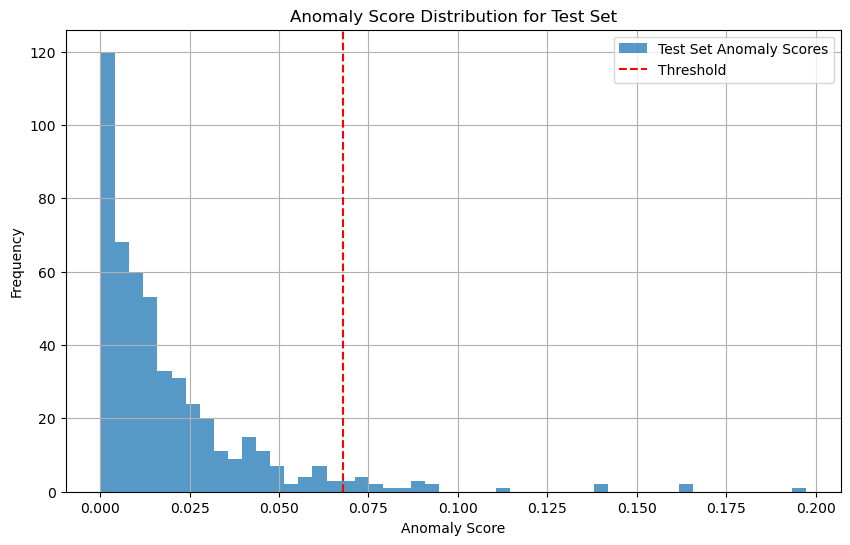

In [15]:
# Detect anomalies specifically on the test set

# Predict reconstructions for the test data
reconstructions_test = vae.predict(X_test)

# Calculate anomaly scores for the test set (reconstruction error)
anomaly_scores_test = np.mean(np.square(X_test - reconstructions_test), axis=1)

# Use the same threshold as defined for the full dataset
anomalies_test = anomaly_scores_test > threshold

# Print anomaly results for the test set
print(f"Anomaly threshold (based on training data): {threshold}")
print(f"Number of anomalies detected in the test set: {np.sum(anomalies_test)}")

# Visualize anomaly scores for the test set
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores_test, bins=50, alpha=0.75, label='Test Set Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Score Distribution for Test Set')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Add anomaly labels to the test set
X_test_with_anomalies = pd.DataFrame(X_test, columns=data.columns[:-1])
X_test_with_anomalies['Anomaly'] = anomalies_test.astype(int)

In [7]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_201 (InputLayer)         [(None, 12)]         0           []                               
                                                                                                  
 dense_700 (Dense)              (None, 80)           1040        ['input_201[0][0]']              
                                                                                                  
 dense_701 (Dense)              (None, 64)           5184        ['dense_700[0][0]']              
                                                                                                  
 dense_702 (Dense)              (None, 16)           1040        ['dense_701[0][0]']              
                                                                                            

In [8]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_202 (InputLayer)      [(None, 16)]              0         
                                                                 
 dense_704 (Dense)           (None, 64)                1088      
                                                                 
 dense_705 (Dense)           (None, 80)                5200      
                                                                 
 dense_706 (Dense)           (None, 12)                972       
                                                                 
Total params: 7,260
Trainable params: 7,260
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Save the test set with anomaly labels to an Excel file
test_output_path = 'C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Anomaly_Detection_Results.xlsx'
# test_output_path = '/Users/hsiaopingni/Desktop/Test_Set_Anomalies.xlsx'
X_test_with_anomalies.to_excel(test_output_path, index=False)
print(f"Anomaly-labeled test data saved to {test_output_path}.")

Anomaly-labeled test data saved to C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Anomaly_Detection_Results.xlsx.


In [18]:
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE_imbalanced.csv', encoding='unicode_escape')
data

,ï»¿Ã¯Â»Â¿ÃÂ¯ÃÂ»ÃÂ¿Discharge Temp (F),Input % full load amps (Motor) (%),Condenser liq temp IN (F),Condenser liq temp OUT (F),Chilled liq temp IN (F),Chilled liq temp OUT (F),Condenser saturation (F),Evaporator saturation (F),Evaporator pressure (PSIG),Condenser pressure (PSIG),Oil sump temp (F),Oil pressure (PSIG),Anomaly
0,0.866750,0.891963,0.854907,0.925923,0.824759,0.781883,0.751440,0.768782,0.825537,0.782719,0.378721,0.810039,0
1,0.708999,0.787102,0.791636,0.842193,0.826321,0.767492,0.800454,0.722910,0.747704,0.640403,0.198034,0.780053,0
2,0.341807,0.569560,0.557868,0.604713,0.616489,0.521129,0.547888,0.526847,0.525626,0.423156,0.384839,0.506927,0
3,0.637970,0.785642,0.773736,0.825706,0.804957,0.746398,0.837360,0.669845,0.715541,0.611272,0.205164,0.742506,0
4,0.862492,0.856954,0.844407,0.957928,0.817680,0.793776,0.766973,0.773708,0.817774,0.779520,0.399203,0.834610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.578263,0.645236,0.591734,0.660712,0.528970,0.532657,0.507930,0.512153,0.528110,0.543803,0.407752,0.536852,0
496,0.542146,0.624297,0.580372,0.672079,0.591472,0.555599,0.626013,0.548138,0.547463,0.517203,0.331385,0.554573,0
497,0.777955,0.927726,0.889624,0.953990,0.947622,0.965337,0.966275,0.949778,0.877789,0.723278,0.466570,0.904314,0
498,0.578580,0.638384,0.584068,0.622179,0.525422,0.523160,0.499653,0.531607,0.522947,0.483033,0.425949,0.504471,0


Optimal Threshold: 0.0679
Precision: 1.00, Recall: 0.95, F1-Score: 0.98
AUC-PR: 1.00


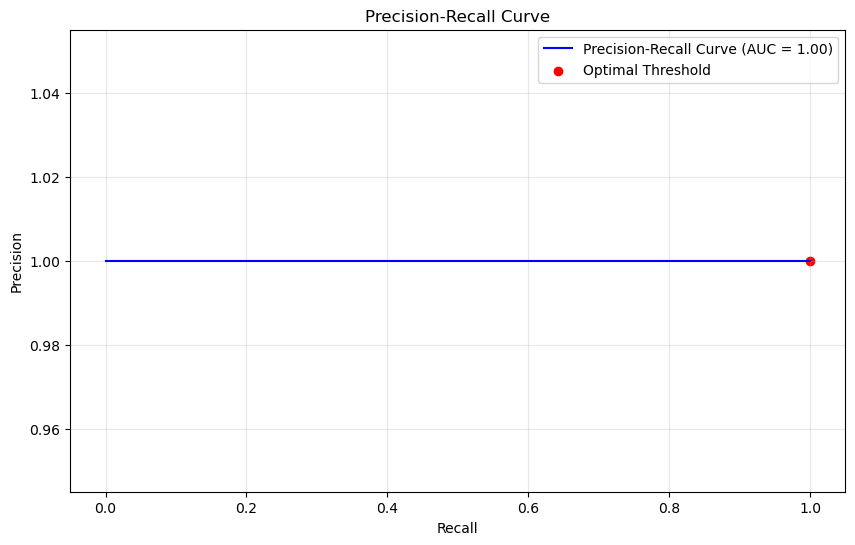

In [19]:
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Replace 'ground_truth' with your actual labels (1 for anomalies, 0 for normal points)
# Example: ground_truth = np.array([...])
# Assuming 'Anomaly' column exists in your dataset, where 1 = Anomaly, 0 = Normal
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE_imbalanced.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿ÃÂ¯ÃÂ»ÃÂ¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)', 'Anomaly']]

ground_truth = data['Anomaly'].values

# Compute precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(ground_truth, anomaly_scores_test)

# Compute AUC-PR
auc_pr = auc(recall, precision)

# Optimal threshold based on F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid divide by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Compute final metrics with the optimal threshold
predicted_labels = anomaly_scores_test > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.2f}, Recall: {recall_final:.2f}, F1-Score: {f1_final:.2f}")
print(f"AUC-PR: {auc_pr:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='blue')
plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='red', label='Optimal Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [20]:
# Final evaluation with optimal threshold
predicted_labels = anomaly_scores_test > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

# Print metrics with more decimal places
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.4f}, Recall: {recall_final:.4f}, F1-Score: {f1_final:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")


Optimal Threshold: 0.0679
Precision: 1.0000, Recall: 0.9545, F1-Score: 0.9767
AUC-PR: 1.0000


Confusion Matrix:
[[478   0]
 [  0  22]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       478
     Anomaly       1.00      1.00      1.00        22

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



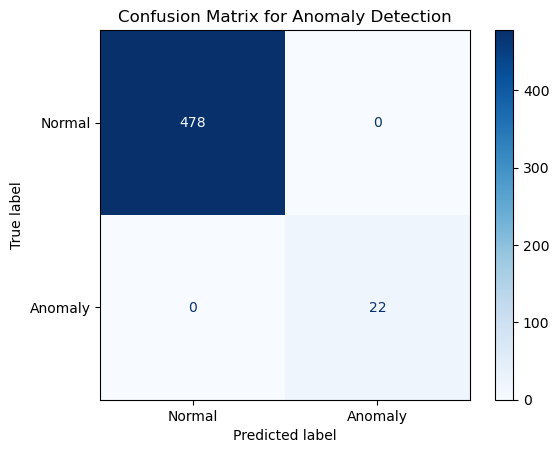

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'True_Anomaly' column exists in the original dataset
true_labels = data['Anomaly']  # Replace with your column name if different
predicted_labels = (anomaly_scores_test > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Anomaly Detection")
plt.show()


# Validation dataset

[I 2024-11-29 16:39:43,642] A new study created in memory with name: no-name-f4d55201-04c6-444d-898c-7c2a9cd28c7a
C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_4656\3991782996.py:75: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-11-29 16:41:11,490] Trial 0 finished with value: 0.16516281366348268 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 32, 'latent_dim': 2, 'learning_rate': 0.0006205789818287648, 'batch_size': 64}. Best is trial 0 with value: 0.16516281366348268.
[I 2024-11-29 16:42:47,292] Trial 1 finished with value: 0.16709077805280687 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 16, 'latent_dim': 6, 'learning_rate': 0.001082839685032612, 'batch_size': 48}. Best is trial 0 with value: 0.16516281366348268.
[I 2024-11-29 16:45:1

[I 2024-11-29 17:45:58,895] Trial 30 finished with value: 0.16482796967029573 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.0003993356952423927, 'batch_size': 64}. Best is trial 22 with value: 0.16432839632034302.
[I 2024-11-29 17:48:09,994] Trial 31 finished with value: 0.1646999254822731 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.0001576577511359341, 'batch_size': 64}. Best is trial 22 with value: 0.16432839632034302.
[I 2024-11-29 17:50:17,767] Trial 32 finished with value: 0.1647126629948616 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00023451572127607272, 'batch_size': 64}. Best is trial 22 with value: 0.16432839632034302.
[I 2024-11-29 17:52:24,802] Trial 33 finished with value: 0.16473469883203506 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 48, 'latent_dim': 14, 'learning_rate': 0.00017098286068713484, 'batch_size': 64}. Best is t

[I 2024-11-29 19:06:05,344] Trial 62 finished with value: 0.16483990997076034 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 64, 'latent_dim': 12, 'learning_rate': 0.00011774319768252953, 'batch_size': 64}. Best is trial 22 with value: 0.16432839632034302.
[I 2024-11-29 19:08:34,699] Trial 63 finished with value: 0.16545561701059341 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 64, 'latent_dim': 10, 'learning_rate': 0.007763724688961382, 'batch_size': 64}. Best is trial 22 with value: 0.16432839632034302.
[I 2024-11-29 19:11:14,025] Trial 64 finished with value: 0.16448755860328673 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00016015349193170846, 'batch_size': 64}. Best is trial 22 with value: 0.16432839632034302.
[I 2024-11-29 19:14:13,317] Trial 65 finished with value: 0.16498373150825502 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 64, 'latent_dim': 14, 'learning_rate': 0.00016405378498089755, 'batch_size': 64}. Best i

[I 2024-11-29 20:37:58,964] Trial 94 finished with value: 0.16458699405193328 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 64, 'latent_dim': 6, 'learning_rate': 0.00018862384238016423, 'batch_size': 64}. Best is trial 90 with value: 0.16431015431880952.
[I 2024-11-29 20:40:55,185] Trial 95 finished with value: 0.16477828472852707 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 64, 'latent_dim': 10, 'learning_rate': 0.00011220257690629584, 'batch_size': 64}. Best is trial 90 with value: 0.16431015431880952.
[I 2024-11-29 20:43:56,385] Trial 96 finished with value: 0.16455045640468596 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 64, 'latent_dim': 10, 'learning_rate': 0.00014378711838534838, 'batch_size': 64}. Best is trial 90 with value: 0.16431015431880952.
[I 2024-11-29 20:46:27,969] Trial 97 finished with value: 0.1651342585682869 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 8, 'learning_rate': 0.0002711486269173674, 'batch_size': 64}. Best is t

Best hyperparameters: {'hidden_dim1': 112, 'hidden_dim2': 64, 'latent_dim': 6, 'learning_rate': 0.0001002123286909899, 'batch_size': 64}
7/7 [==============================] - 0s 1ms/step
Best validation fold loss: 0.14718450605869293
Anomaly threshold: 0.03388365881537465
Number of anomalies detected in the best validation fold: 10


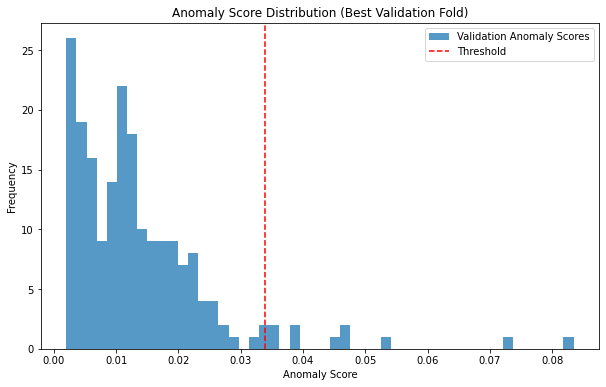

Anomaly-labeled best validation fold saved to C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_imbalanced_Best_Validation_Fold_Anomaly_Detection_Results.xlsx.


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

# Load and preprocess the data
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Augmented_Chiller_Data.csv', encoding='unicode_escape')
data = data[['ï»¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Define the Sampling layer for VAE
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# Define VAE architecture
def build_vae(input_dim, hidden_dims, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    x = inputs
    for dim in hidden_dims:
        x = Dense(dim, activation='relu')(x)
    mean = Dense(latent_dim)(x)
    log_var = Dense(latent_dim)(x)
    z = Sampling()([mean, log_var])
    encoder = Model(inputs, [mean, log_var, z], name="encoder")
    
    # Decoder
    latent_inputs = Input(shape=(latent_dim,))
    x = latent_inputs
    for dim in reversed(hidden_dims):
        x = Dense(dim, activation='relu')(x)
    outputs = Dense(input_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name="decoder")
    
    # VAE Model
    reconstructed = decoder(encoder(inputs)[2])
    vae = Model(inputs, reconstructed, name="vae")
    
    # VAE Loss
    reconstruction_loss = mse(inputs, reconstructed) * input_dim
    kl_loss = 1 + log_var - tf.square(mean) - tf.exp(log_var)
    kl_loss = tf.reduce_sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    
    return vae, encoder, decoder

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden_dim1 = trial.suggest_int('hidden_dim1', 32, 128, step=16)
    hidden_dim2 = trial.suggest_int('hidden_dim2', 16, 64, step=16)
    latent_dim = trial.suggest_int('latent_dim', 2, 16, step=2)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_int('batch_size', 16, 64, step=16)
    
    hidden_dims = [hidden_dim1, hidden_dim2]
    vae, _, _ = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    val_losses = []
    
    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        history = vae.fit(x_train_fold, x_train_fold, validation_data=(x_val_fold, x_val_fold), 
                          epochs=100, batch_size=batch_size, verbose=0)
        val_loss = min(history.history['val_loss'])
        val_losses.append(val_loss)
    
    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final VAE using the best hyperparameters
hidden_dims = [best_params['hidden_dim1'], best_params['hidden_dim2']]
latent_dim = best_params['latent_dim']
learning_rate = best_params['learning_rate']
batch_size = best_params['batch_size']

vae, encoder, decoder = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

# Perform 10-fold cross-validation and detect anomalies in the best validation fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_val_loss = float('inf')
best_x_val_fold = None
fold = 1

for train_index, val_index in kf.split(X_train):
    x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
    history = vae.fit(x_train_fold, x_train_fold, epochs=100, batch_size=batch_size, verbose=0, validation_data=(x_val_fold, x_val_fold))
    
    val_loss = min(history.history['val_loss'])
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_x_val_fold = x_val_fold
    fold += 1

# Anomaly detection on the best validation fold
val_reconstructions = vae.predict(best_x_val_fold)
val_anomaly_scores = np.mean(np.square(best_x_val_fold - val_reconstructions), axis=1)

# Set an anomaly threshold
threshold = np.percentile(val_anomaly_scores, 95)  # Top 5% as anomalies
val_anomalies = val_anomaly_scores > threshold

# Print anomaly results for the best validation fold
print(f"Best validation fold loss: {best_val_loss}")
print(f"Anomaly threshold: {threshold}")
print(f"Number of anomalies detected in the best validation fold: {np.sum(val_anomalies)}")

# Visualize anomaly scores for the best validation fold
plt.figure(figsize=(10, 6))
plt.hist(val_anomaly_scores, bins=50, alpha=0.75, label='Validation Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Score Distribution (Best Validation Fold)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Save the best validation fold with anomaly labels
val_data_with_anomalies = pd.DataFrame(best_x_val_fold, columns=data.columns)
val_data_with_anomalies['Anomaly'] = val_anomalies.astype(int)
output_path = 'C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_imbalanced_Best_Validation_Fold_Anomaly_Detection_Results.xlsx'
val_data_with_anomalies.to_excel(output_path, index=False)
print(f"Anomaly-labeled best validation fold saved to {output_path}.")

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_imbalanced_Best_Validation_Fold_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE.csv', encoding='unicode_escape')
data

,ï»¿Ã¯Â»Â¿Discharge Temp (F),Input % full load amps (Motor) (%),Condenser liq temp IN (F),Condenser liq temp OUT (F),Chilled liq temp IN (F),Chilled liq temp OUT (F),Condenser saturation (F),Evaporator saturation (F),Evaporator pressure (PSIG),Condenser pressure (PSIG),Oil sump temp (F),Oil pressure (PSIG),Anomaly
0,0.636116,0.854860,0.647579,0.530608,0.599050,0.782204,0.577827,0.850382,0.699464,0.649822,0.347970,0.860988,0
1,0.671493,0.595135,0.586793,0.497410,0.651551,0.696916,0.535324,0.804685,0.622122,0.607801,0.401428,0.746790,0
2,0.819001,0.774224,0.690918,0.593242,0.753713,0.984137,0.670343,0.962906,0.983994,0.664768,0.277427,0.989769,1
3,0.434704,0.541196,0.411031,0.345001,0.798620,0.768919,0.385157,0.752789,0.679230,0.226149,0.372278,0.740843,0
4,0.502534,0.544240,0.519906,0.583337,0.990357,0.792069,0.494602,0.825216,0.763840,0.508329,0.388869,0.860047,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.497473,0.493473,0.402495,0.252627,0.389074,0.657364,0.257878,0.600329,0.490081,0.327224,0.314751,0.569522,0
196,0.581303,0.730995,0.554141,0.507565,0.713776,0.724597,0.501497,0.783668,0.659413,0.592652,0.251618,0.837590,0
197,0.584144,0.611051,0.586246,0.457913,0.634459,0.679456,0.489789,0.779014,0.588067,0.576034,0.322388,0.787995,0
198,0.586407,0.607092,0.446066,0.450392,0.517956,0.769711,0.415845,0.782525,0.657257,0.378825,0.317437,0.716601,0


Optimal Threshold: 0.0359
Precision: 1.00, Recall: 0.90, F1-Score: 0.95
AUC-PR: 1.00


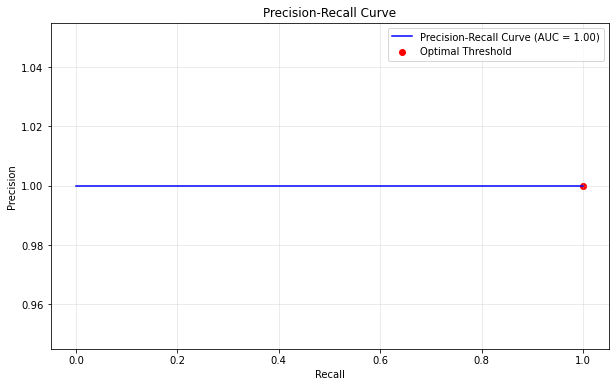

In [20]:
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Replace 'ground_truth' with your actual labels (1 for anomalies, 0 for normal points)
# Example: ground_truth = np.array([...])
# Assuming 'Anomaly' column exists in your dataset, where 1 = Anomaly, 0 = Normal
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_imbalanced_Best_Validation_Fold_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)', 'Anomaly']]


ground_truth = data['Anomaly'].values

# Compute precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(ground_truth, val_anomaly_scores)

# Compute AUC-PR
auc_pr = auc(recall, precision)

# Optimal threshold based on F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid divide by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Compute final metrics with the optimal threshold
predicted_labels = val_anomaly_scores > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.2f}, Recall: {recall_final:.2f}, F1-Score: {f1_final:.2f}")
print(f"AUC-PR: {auc_pr:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='blue')
plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='red', label='Optimal Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [21]:
# Final evaluation with optimal threshold
predicted_labels = val_anomaly_scores > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

# Print metrics with more decimal places
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.4f}, Recall: {recall_final:.4f}, F1-Score: {f1_final:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")

Optimal Threshold: 0.0359
Precision: 1.0000, Recall: 0.9000, F1-Score: 0.9474
AUC-PR: 1.0000


Confusion Matrix:
[[190   0]
 [  7   3]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98       190
     Anomaly       1.00      0.30      0.46        10

    accuracy                           0.96       200
   macro avg       0.98      0.65      0.72       200
weighted avg       0.97      0.96      0.96       200



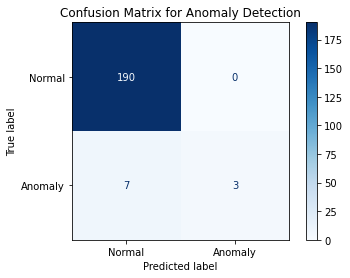

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'True_Anomaly' column exists in the original dataset
true_labels = data['Anomaly']  # Replace with your column name if different
predicted_labels = (val_anomaly_scores > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Anomaly Detection")
plt.show()

# Test dataset

[I 2024-11-29 20:55:26,084] A new study created in memory with name: no-name-501a8b52-fed7-420c-a319-b22165b5ce42
C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_4656\878862637.py:76: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-11-29 20:59:25,906] Trial 0 finished with value: 0.16878994107246398 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 32, 'latent_dim': 16, 'learning_rate': 0.00014449085608458622, 'batch_size': 32}. Best is trial 0 with value: 0.16878994107246398.
[I 2024-11-29 21:03:33,635] Trial 1 finished with value: 0.16683146059513093 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00029765049146448803, 'batch_size': 48}. Best is trial 1 with value: 0.16683146059513093.
[I 2024-11-29 21

[I 2024-11-29 22:52:24,492] Trial 30 finished with value: 0.16659314781427384 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 16, 'latent_dim': 8, 'learning_rate': 0.0001528554449833072, 'batch_size': 48}. Best is trial 24 with value: 0.1647436037659645.
[I 2024-11-29 22:55:37,952] Trial 31 finished with value: 0.16468205600976943 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 16, 'latent_dim': 10, 'learning_rate': 0.00013794605308765898, 'batch_size': 64}. Best is trial 31 with value: 0.16468205600976943.
[I 2024-11-29 22:58:51,227] Trial 32 finished with value: 0.16447930485010148 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 16, 'latent_dim': 8, 'learning_rate': 0.00013354684959037896, 'batch_size': 64}. Best is trial 32 with value: 0.16447930485010148.
[I 2024-11-29 23:02:05,249] Trial 33 finished with value: 0.16461971253156663 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 16, 'latent_dim': 6, 'learning_rate': 0.00013271827231907832, 'batch_size': 64}. Best is

[I 2024-11-30 01:01:04,848] Trial 62 finished with value: 0.16474297642707825 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 64, 'latent_dim': 4, 'learning_rate': 0.00010260426529308037, 'batch_size': 64}. Best is trial 36 with value: 0.16441290825605392.
[I 2024-11-30 01:06:03,369] Trial 63 finished with value: 0.16447065472602845 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 64, 'latent_dim': 6, 'learning_rate': 0.00011897878139149885, 'batch_size': 64}. Best is trial 36 with value: 0.16441290825605392.
[I 2024-11-30 01:10:24,552] Trial 64 finished with value: 0.1646609053015709 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 64, 'latent_dim': 4, 'learning_rate': 0.00011781356313439658, 'batch_size': 64}. Best is trial 36 with value: 0.16441290825605392.
[I 2024-11-30 01:15:44,588] Trial 65 finished with value: 0.1654128134250641 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 64, 'latent_dim': 2, 'learning_rate': 0.0020669794395001572, 'batch_size': 64}. Best is t

[I 2024-11-30 03:22:30,914] Trial 94 finished with value: 0.16486508399248123 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 8, 'learning_rate': 0.0002617705410559765, 'batch_size': 64}. Best is trial 89 with value: 0.1643243432044983.
[I 2024-11-30 03:26:55,972] Trial 95 finished with value: 0.16505146622657776 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 8, 'learning_rate': 0.0002753807368220659, 'batch_size': 64}. Best is trial 89 with value: 0.1643243432044983.
[I 2024-11-30 03:31:18,230] Trial 96 finished with value: 0.16454731673002243 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 6, 'learning_rate': 0.00019740262956685536, 'batch_size': 64}. Best is trial 89 with value: 0.1643243432044983.
[I 2024-11-30 03:45:52,360] Trial 97 finished with value: 0.1707881808280945 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 64, 'latent_dim': 6, 'learning_rate': 0.0003056125232199766, 'batch_size': 16}. Best is trial 89 

Best hyperparameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 6, 'learning_rate': 0.00016703177246272114, 'batch_size': 64}
Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.5054
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.3765
Epoch 3/100
32/32 [==============================] - 0s 11ms/step - loss: 0.3059
Epoch 4/100
32/32 [==============================] - 0s 10ms/step - loss: 0.2574
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 0.2265
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 0.2098
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 0.2013
Epoch 8/100
32/32 [==============================] - 0s 10ms/step - loss: 0.1934
Epoch 9/100
32/32 [==============================] - 0s 10ms/step - loss: 0.1932
Epoch 10/100
32/32 [==============================] - 0s 10ms/step - loss: 0.1921
Epoch 11/100
32/32 [==============================] 

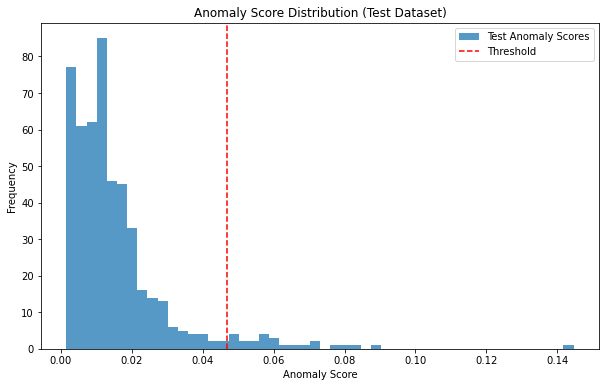

Anomaly-labeled test dataset saved to C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Test_Anomaly_Detection_Results.xlsx.


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

# Load and preprocess the data
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Augmented_Chiller_Data.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/LT_Chiller_Data.csv', encoding='unicode_escape')
data = data[['ï»¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Define the Sampling layer for VAE
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# Define VAE architecture
def build_vae(input_dim, hidden_dims, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    x = inputs
    for dim in hidden_dims:
        x = Dense(dim, activation='relu')(x)
    mean = Dense(latent_dim)(x)
    log_var = Dense(latent_dim)(x)
    z = Sampling()([mean, log_var])
    encoder = Model(inputs, [mean, log_var, z], name="encoder")
    
    # Decoder
    latent_inputs = Input(shape=(latent_dim,))
    x = latent_inputs
    for dim in reversed(hidden_dims):
        x = Dense(dim, activation='relu')(x)
    outputs = Dense(input_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name="decoder")
    
    # VAE Model
    reconstructed = decoder(encoder(inputs)[2])
    vae = Model(inputs, reconstructed, name="vae")
    
    # VAE Loss
    reconstruction_loss = mse(inputs, reconstructed) * input_dim
    kl_loss = 1 + log_var - tf.square(mean) - tf.exp(log_var)
    kl_loss = tf.reduce_sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    
    return vae, encoder, decoder

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden_dim1 = trial.suggest_int('hidden_dim1', 32, 128, step=16)
    hidden_dim2 = trial.suggest_int('hidden_dim2', 16, 64, step=16)
    latent_dim = trial.suggest_int('latent_dim', 2, 16, step=2)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_int('batch_size', 16, 64, step=16)
    
    hidden_dims = [hidden_dim1, hidden_dim2]
    vae, _, _ = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    val_losses = []
    
    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        history = vae.fit(x_train_fold, x_train_fold, validation_data=(x_val_fold, x_val_fold), 
                          epochs=100, batch_size=batch_size, verbose=0)
        val_loss = min(history.history['val_loss'])
        val_losses.append(val_loss)
    
    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final VAE using the best hyperparameters
hidden_dims = [best_params['hidden_dim1'], best_params['hidden_dim2']]
latent_dim = best_params['latent_dim']
learning_rate = best_params['learning_rate']
batch_size = best_params['batch_size']

vae, encoder, decoder = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history = vae.fit(X_train, X_train, epochs=100, batch_size=batch_size, verbose=1)

# Anomaly detection on the test dataset
reconstructions = vae.predict(X_test)
test_anomaly_scores = np.mean(np.square(X_test - reconstructions), axis=1)

# Set an anomaly threshold
threshold = np.percentile(test_anomaly_scores, 95)  # Top 5% as anomalies
test_anomalies = test_anomaly_scores > threshold

# Print anomaly results for the test dataset
print(f"Anomaly threshold: {threshold}")
print(f"Number of anomalies detected in the test dataset: {np.sum(test_anomalies)}")

# Visualize anomaly scores for the test dataset
plt.figure(figsize=(10, 6))
plt.hist(test_anomaly_scores, bins=50, alpha=0.75, label='Test Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Score Distribution (Test Dataset)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Add anomaly labels to the test dataset
test_data_with_anomalies = pd.DataFrame(X_test, columns=data.columns)
test_data_with_anomalies['Anomaly'] = test_anomalies.astype(int)

# Save the test dataset with anomaly labels to an Excel file
output_path = 'C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Test_Anomaly_Detection_Results.xlsx'
#output_path = '/Users/hsiaopingni/Desktop/VAE_Test_Anomaly_Detection_Results.xlsx'
test_data_with_anomalies.to_excel(output_path, index=False)
print(f"Anomaly-labeled test dataset saved to {output_path}.")


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Test_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE.csv', encoding='unicode_escape')
data

,ï»¿Ã¯Â»Â¿Discharge Temp (F),Input % full load amps (Motor) (%),Condenser liq temp IN (F),Condenser liq temp OUT (F),Chilled liq temp IN (F),Chilled liq temp OUT (F),Condenser saturation (F),Evaporator saturation (F),Evaporator pressure (PSIG),Condenser pressure (PSIG),Oil sump temp (F),Oil pressure (PSIG),Anomaly
0,0.650027,0.739375,0.647870,0.520050,0.657101,0.731260,0.537136,0.903831,0.689489,0.656816,0.431851,0.862861,0
1,0.656406,0.637648,0.520976,0.479600,0.552616,0.804574,0.453018,0.770545,0.685471,0.442129,0.326004,0.730721,0
2,0.684070,0.663540,0.592744,0.510532,0.608702,0.792531,0.511567,0.765402,0.684194,0.530269,0.321983,0.736351,0
3,0.476221,0.462331,0.429282,0.219398,0.486288,0.663340,0.263530,0.622036,0.496516,0.302598,0.317580,0.607124,0
4,0.566771,0.588915,0.517957,0.601768,0.959864,0.860923,0.481328,0.843858,0.790348,0.533623,0.285826,0.881912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.767285,0.810898,0.715481,0.606039,0.760595,0.867942,0.609536,0.925933,0.765658,0.659048,0.372668,0.867292,0
496,0.483543,0.393647,0.461350,0.325207,0.450519,0.571363,0.416733,0.681467,0.438790,0.381304,0.353955,0.592974,0
497,0.631546,0.655928,0.509644,0.489708,0.556098,0.776050,0.456928,0.775007,0.665677,0.461691,0.298510,0.740081,0
498,0.717854,0.693456,0.670339,0.540777,0.666881,0.772108,0.568507,0.769187,0.671858,0.637600,0.332479,0.733647,0


Optimal Threshold: 0.0486
Precision: 1.00, Recall: 0.96, F1-Score: 0.98
AUC-PR: 1.00


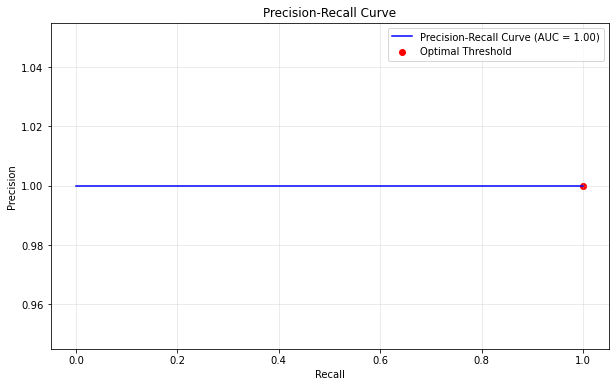

In [25]:
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Replace 'ground_truth' with your actual labels (1 for anomalies, 0 for normal points)
# Example: ground_truth = np.array([...])
# Assuming 'Anomaly' column exists in your dataset, where 1 = Anomaly, 0 = Normal
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Imbalanced_Test_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)', 'Anomaly']]


ground_truth = data['Anomaly'].values

# Compute precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(ground_truth, test_anomaly_scores)

# Compute AUC-PR
auc_pr = auc(recall, precision)

# Optimal threshold based on F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid divide by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Compute final metrics with the optimal threshold
predicted_labels = test_anomaly_scores > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.2f}, Recall: {recall_final:.2f}, F1-Score: {f1_final:.2f}")
print(f"AUC-PR: {auc_pr:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='blue')
plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='red', label='Optimal Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [26]:
# Final evaluation with optimal threshold
predicted_labels = test_anomaly_scores > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

# Print metrics with more decimal places
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.4f}, Recall: {recall_final:.4f}, F1-Score: {f1_final:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")

Optimal Threshold: 0.0486
Precision: 1.0000, Recall: 0.9600, F1-Score: 0.9796
AUC-PR: 1.0000


Confusion Matrix:
[[475   0]
 [  0  25]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       475
     Anomaly       1.00      1.00      1.00        25

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



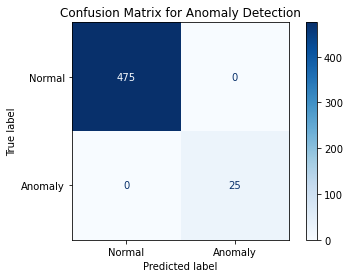

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'True_Anomaly' column exists in the original dataset
true_labels = data['Anomaly']  # Replace with your column name if different
predicted_labels = (test_anomaly_scores > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Anomaly Detection")
plt.show()